In [15]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import os
from lung_masking.utils.dice import dice_coef
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
def dice_error(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [6]:
model = keras.models.load_model('lung_masking\\unet_model_16_filters_kernel2x2.h5',custom_objects={'dice_coef':dice_coef,'dice_error':dice_error})

train_gen = ImageDataGenerator()

In [7]:
BATCH_SIZE = 50

INPUT_SHAPE = (128, 128, 3)

In [31]:
train_data_filepath = os.getcwd() + "/data" + "/test"
print(train_data_filepath)
train_set = train_gen.flow_from_directory(  train_data_filepath,
                                                target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary',
                                                color_mode='grayscale')

c:\Users\pstanfel_a\Documents\CSCI 575\Applied Project\code\0xDEADBEEFCAFE\python\pneumonia/data/test
Found 624 images belonging to 2 classes.


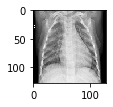

In [42]:
images = next(train_set)
image = images[0][0]
ax = plt.subplot(1, 4, 1)

ax.imshow(image[...,0], cmap=cm.Greys_r, interpolation='none')

segmentations = model.predict(images[0]).argmax(axis=3)

(50, 128, 128)


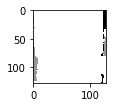

In [43]:
ax = plt.subplot(1,4,2)
print(np.shape(segmentations))
ax.imshow(segmentations[0], cmap=cm.Greys_r, interpolation='none')